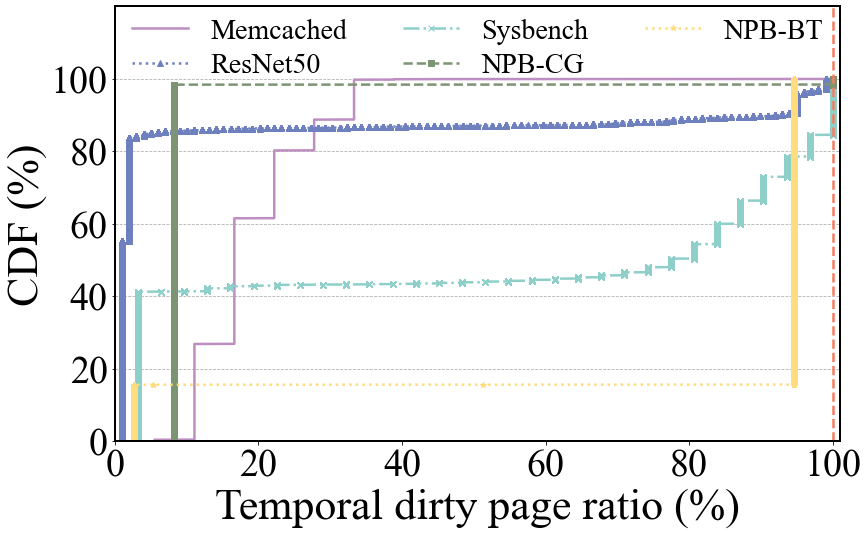

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import json
import matplotlib

# Set matplotlib global settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Style and layout parameters
label_size = 44
tick_size = 38
linewidth = 2.5
legend_size = 28
mark_size = 10
bwith = 2

# Extended Color palette
colors = {
    'purple': '#BD8EC0',
    'blue': '#6F80BE',
    'orange': '#F47E62',
    'light_blue': '#7ED0F6',
    'yellow': '#FFDC7E',
    'light_orange': '#FAAA89',
    'green': '#8ECFC9',
    'pink': '#ff8884',
    'red': '#e53935',
    'dark_blue': '#344955',
    'olive': '#7c9473',
    'brown': '#8b5a2b',
    'deep_purple': '#5e35b1'
}

# Function to read data and calculate dirty rates
def read_and_calculate(filename):
    with open(filename, "r") as file:
        data = json.load(file)
    max_iterations = max(len(entry["isDirtyList"]) for entry in data.values())
    dirty_rates = [sum(entry["isDirtyList"]) / max_iterations for entry in data.values()]
    sorted_dirty_rates = np.sort(dirty_rates)*100
    yvals = np.arange(len(sorted_dirty_rates)) / float(len(sorted_dirty_rates) - 1) * 100  # Multiply by 100 to convert to percentage
    return sorted_dirty_rates, yvals

# Read data from JSON files
memcached_rates, memcached_yvals = read_and_calculate("dirty.json")
system_rates, system_yvals = read_and_calculate("cifar_dirty.json")
mysql_rates, mysql_yvals = read_and_calculate("dirty_mysql.json")
new_data1_rates, new_data1_yvals = read_and_calculate("cg-B-dirty.json")
new_data2_rates, new_data2_yvals = read_and_calculate("bt-B-dirty.json")

# Create the plot
fig, ax1 = plt.subplots(figsize=(13, 8))  # Increased size
plt.plot(memcached_rates, memcached_yvals, linewidth=linewidth, color=colors['purple'], label="Memcached", linestyle="-")
plt.plot(system_rates, system_yvals, linewidth=linewidth, color=colors['blue'], linestyle=":", marker='^', label="ResNet50")
plt.plot(mysql_rates, mysql_yvals, linewidth=linewidth, color=colors['green'], linestyle="-.", marker="x", label="Sysbench")
plt.plot(new_data1_rates, new_data1_yvals, linewidth=linewidth, color=colors['olive'], linestyle="--", marker='s', label="NPB-CG")
plt.plot(new_data2_rates, new_data2_yvals, linewidth=linewidth, color=colors['yellow'], linestyle=":", marker='*', label="NPB-BT")

# Set labels and custom settings
plt.ylabel('CDF (%)', fontsize=label_size)  # Label now correctly indicates percentages
#plt.yticks(np.arange(0, 121, 40), [f"{x}" for x in range(0, 121, 40)], fontsize=tick_size)  # Adjust tick labels to show percentage
plt.ylim(0, 120)  # Adjust the limit to 120 for percentage
plt.xlabel('Temporal dirty page ratio (%)', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.axvline(x=100, color=colors['orange'], linestyle='--', linewidth=linewidth)
plt.xlim(0, 101)
plt.legend(prop={'size': legend_size}, frameon=False, labelspacing=0.3, handlelength=2, borderaxespad=0.01, loc="upper center", bbox_to_anchor=(0.5, 1.0), ncol=3)
plt.grid(axis='y', linestyle='--')
# Ensure the top y-tick (120) is shown
yticks = np.arange(0, 121, 20)  # Set the y-ticks
plt.yticks(yticks[:-1], [f"{x}" for x in yticks[:-1]], fontsize=tick_size)  # Exclude the maximum value

# Customize spines
for spine in ['top', 'bottom', 'left', 'right']:
    ax1.spines[spine].set_linewidth(bwith)

# Save and show the plot
plt.savefig('cdf_en.pdf', format='pdf', bbox_inches='tight', transparent=True)
#plt.savefig('cdf_en.png', format='png', bbox_inches='tight', transparent=True)
plt.show()
